In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
%pylab inline

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title input_test.csv, id 1slrwH2vzPkSfJsTZKCle3PS3iG8evmnu
title output_training_hTMcdrS (1).csv, id 1g45o50o74i37MJqUaH-EeTUsP3cHBWR0
title input_training.csv, id 1TMPIqHUmMXKiv2bf_i1-mzj81Ogdrsdw


In [0]:
# Download a file based on its file ID.

id = '1TMPIqHUmMXKiv2bf_i1-mzj81Ogdrsdw'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('input_training.csv')  
train_data= pd.read_csv('input_training.csv')

In [8]:
train_data.head()

,ID,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,10:20:00,10:25:00,10:30:00,10:35:00,10:40:00,10:45:00,10:50:00,10:55:00,11:00:00,11:05:00,11:10:00,11:15:00,11:20:00,11:25:00,11:30:00,11:35:00,11:40:00,11:45:00,11:50:00,11:55:00,12:00:00,12:05:00,12:10:00,12:15:00,12:20:00,12:25:00,12:30:00,12:35:00,12:40:00,12:45:00,12:50:00,12:55:00,13:00:00,13:05:00,13:10:00,13:15:00,13:20:00,13:25:00,13:30:00,13:35:00,13:40:00,13:45:00,13:50:00,13:55:00,14:00:00,14:05:00,14:10:00,14:15:00,14:20:00,14:25:00,14:30:00,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
0,0,975514820,2059277756,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,-0.320252,-0.384785,-0.256910,-0.900090,-0.129039,-0.129104,0.064585,-0.387410,-0.064666,0.258731,-1.098495,0.064896,-0.064880,-0.324482,0.194937,0.064929,0.519303,-0.194344,0.194492,0.777374,-0.064585,0.000000,-0.129202,0.129267,0.000000,-0.452207,-0.064716,-0.258928,-0.388786,0.259585,0.000000,-0.064831,0.453929,-0.323660,0.000000,0.259256,-0.129497,-0.064781,0.259190,-0.194196,0.453468,-0.064666,0.000000,-0.129366,0.323578,0.000000,0.517070,-0.258013,0.258273,-0.129006,0.000000,-0.064536,-0.258208,0.129235,-0.258339,-0.193950,0.129398,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022
1,1,975514820,661006643,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,0.130601,0.261071,0.130405,0.130340,0.000000,-0.130275,0.130340,0.000000,0.455961,0.000000,-0.130047,0.000000,0.650560,-0.129788,-0.519411,-0.130112,0.000000,0.065089,-0.065072,-0.260354,-0.260614,-0.195656,-0.065268,0.326421,-0.130405,-0.260940,-0.065300,0.261267,0.130503,0.260875,0.130307,-0.065121,0.130275,0.390629,0.065007,0.064991,0.389850,-0.519023,-0.325037,-0.390531,0.000000,-0.130372,-0.065219,-0.130470,0.000000,0.000000,0.326339,0.000000,-0.065186,-0.130405,0.130470,-0.195607,0.065251,0.000000,0.000000,-0.260940,0.000000,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557
2,2,975514820,2252275018,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,1.103954,0.587386,-1.095339,-0.574771,0.208303,0.630542,-0.402462,0.347219,0.122446,-0.056845,0.222259,0.191040,0.429745,0.053589,-0.386521,0.230273,-0.400565,-0.033761,0.339111,-0.144419,-0.504458,0.173000,-0.166326,0.113288,NaN,-0.581179,-0.058946,0.029037,-0.264249,-0.058772,0.358270,-0.436575,-0.090113,-0.268220,0.273938,-0.300095,0.255542,0.219462,0.009756,-0.169758,0.241045,-0.422619,0.861903,-0.079175,-0.043251,0.048260,0.000599,-0.095017,0.490884,0.658008,0.036576,0.139653,-0.011309,0.029409,-0.331103,-0.236124,-0.256959,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346
3,3,975514820,901241465,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,-0.827777,-0.291823,0.302953,-0.229828,0.674382,-0.646990,-0.006002,-0.258403,0.512462,0.209581,-1.131744,0.428971,-0.112520,-0.683127,0.277338,-0.134035,-0.124190,0.196775,0.553562,-0.144010,0.234784,-0.124352,-0.058201,0.111158,0.476066,-0.843241,-0.233058,-0.475416,0.059371,0.498486,0.390726,0.476144,0.228087,-0.630597,0.194059,-0.111132,-0.184750,-0.170428,0.304415,0.078454,-0.257402,0.261525,0.314271,-0.646613,-0.360380,-0.108701,-0.537355,-0.140600,-0.075488,-0.325931,-0.006815,-0.245942,0.074408,-0.009349,0.336335,-0.185523,0.521719,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833
4,4,975514820,1213815424,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,1.186248,-0.269528,0.196175,-0.755941,-0.357649,0.875004,0.636713,0.509647,0.157567,0.962157,-0.502309,-0.285578,0.260371,0.472079,-0.133699,-0.033602,0.612150,0.052271,-0.039839,0.109932,0.466685,-0.249362,0.406413,-0.260829,0.748697,0.368675,-0.447986,-0.922882,-0.017411,0.352352,0.473783,0.440662,-0.136045,-0.247754,0.273805,0.179370,-0.610452,0.178690,-0.317357,-0.547541,0.515383,0.172688,0.004467,0.666214,0.171539,-0.213380,-0.149159,-0.033096,-0.39886

In [0]:
# Download a file based on its file ID.

id = '1slrwH2vzPkSfJsTZKCle3PS3iG8evmnu'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('input_test.csv')  
test_data= pd.read_csv('input_test.csv')

In [10]:
test_data.head(20)

,ID,eqt_code,date,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,10:20:00,10:25:00,10:30:00,10:35:00,10:40:00,10:45:00,10:50:00,10:55:00,11:00:00,11:05:00,11:10:00,11:15:00,11:20:00,11:25:00,11:30:00,11:35:00,11:40:00,11:45:00,11:50:00,11:55:00,12:00:00,12:05:00,12:10:00,12:15:00,12:20:00,12:25:00,12:30:00,12:35:00,12:40:00,12:45:00,12:50:00,12:55:00,13:00:00,13:05:00,13:10:00,13:15:00,13:20:00,13:25:00,13:30:00,13:35:00,13:40:00,13:45:00,13:50:00,13:55:00,14:00:00,14:05:00,14:10:00,14:15:00,14:20:00,14:25:00,14:30:00,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
0,745327,975514820,1187660213,-5.765868,-0.496553,0.852754,-0.354230,0.567489,-0.070792,-0.637290,-1.561391,-0.214117,-0.285709,-0.643504,-1.504986,0.648496,1.293981,0.572444,0.428453,-0.142598,0.142671,-0.570394,0.500118,0.499222,0.142380,-0.853843,0.856467,0.071154,0.000000,0.071135,1.280110,0.707920,-0.282450,-0.494790,0.070810,0.283168,-0.282881,-0.566336,0.283745,0.425184,0.000000,-0.212268,0.212430,0.424536,-0.494539,0.424644,-0.494664,0.070792,0.141548,0.424429,-0.211892,-0.070684,0.494915,-0.211730,-0.211892,-0.282737,0.070756,0.212214,0.141369,0.282594,-0.494038,0.141404,-0.211999,-0.212160,0.566192,0.282522,-0.070559,0.070577,-0.070559,0.282307,-0.211516,0.000000,-0.423354,0.847996
1,745328,975514820,4075379637,-0.118653,-1.064350,1.176763,-1.236418,0.737534,-0.528558,0.273105,-0.334460,-0.073352,0.301624,0.871820,-0.621214,0.166303,0.203944,1.718414,0.076285,0.823223,-0.012369,0.323536,-1.647851,0.065739,-0.240767,-1.835417,0.784974,0.113457,-0.004454,-0.182364,-0.837960,0.057854,-0.010819,0.480647,0.831606,0.157250,0.583019,0.017871,0.077410,-1.253997,-0.023639,0.369670,0.254774,0.151133,-0.390402,-0.156030,0.243928,0.072811,-0.043648,-0.102534,-0.368662,-0.238011,0.047127,-0.111800,0.023256,0.075521,0.231656,0.129949,-0.064938,0.253032,-0.713394,-0.239311,0.431490,-0.479053,0.462204,-0.131886,0.127535,-0.019407,0.091653,0.652775,-0.080896,0.154637,0.028959,-0.402765
2,745329,975514820,1509397268,2.129608,2.576919,0.096924,0.038237,0.502499,-0.843588,0.012090,-0.475902,-0.454335,-0.713297,-0.436543,-0.245654,0.509641,-0.314734,-0.457676,-0.050597,0.257577,0.457974,0.241602,-0.378878,-0.416881,0.013540,-0.365864,-0.308946,0.902113,-0.171258,0.471706,-0.538990,-0.483735,-0.677110,0.126855,0.100088,-0.123243,0.041295,-0.165041,-0.344873,-0.215123,0.076358,0.295813,0.016018,-0.416462,-0.022811,0.405793,-0.192662,0.036488,0.081816,0.033668,0.074509,-0.012662,-0.240944,0.230880,0.135925,0.246300,0.056872,0.156497,0.073820,0.222645,-0.397282,0.078690,-0.296340,-0.159304,0.114274,NaN,-0.013945,0.254572,-0.081304,-0.117928,0.154551,0.084374,-0.048784,0.087395
3,745330,975514820,3930524002,-3.721837,-0.683264,0.160819,0.481751,0.107608,-1.526547,1.173124,0.265354,-0.504789,-0.446128,-0.110275,0.683117,NaN,NaN,NaN,NaN,1.526250,0.032206,1.249324,0.083068,0.050331,0.345045,-1.413711,0.177348,1.696099,-0.838191,0.331435,-1.060097,-0.538661,-0.048407,0.486610,-0.444197,0.047952,1.077610,0.515892,0.453955,NaN,-0.710372,-0.078531,1.137603,-0.224315,0.583021,-0.544303,-0.402630,0.288705,-0.484927,0.715249,0.307544,-0.347898,-0.015151,0.400352,NaN,-1.163282,0.743199,-0.484696,-0.034815,0.438741,0.499645,-0.907187,-0.127044,-0.218428,0.065752,-0.633331,-0.022578,0.366928,-0.492304,-0.115243,0.434085,0.154235,-0.495052,-0.808245
4,745331,975514820,3466359530,-28.674284,1.121113,3.280041,-1.320061,-1.451639,0.581340,-1.300371,0.877779,5.297956,3.446321,-0.652689,1.565886,1.039192,-1.178315,-1.106172,-0.265057,-3.328858,-0.893558,-1.741100,-0.097744,-0.559683,-0.800538,-0.357786,0.919411,-0.140672,-0.811600,-0.949341,0.896038,-2.099244,-0.846834,2.612353,-0.874948,0.852425,0.920845,-0.287864,-1.780426,0.697861,-0.057161,-2.335001,0.172174,0.428033,-0.410695,-0.384485,0.888313,-0.283278,0.098723,1.651268,0.144791,-1.067501,0.456954,0.083403,-1.024833,1.876384,0.399706,-0.753011,-0.667080,-0.415

In [0]:
# Download a file based on its file ID.

id = '1g45o50o74i37MJqUaH-EeTUsP3cHBWR0'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('output_training_hTMcdrS (1).csv')  
output_train_data= pd.read_csv('output_training_hTMcdrS (1).csv')

In [12]:
output_train_data.head(10)

,ID,end_of_day_return
0,0,0.964025
1,1,-0.583286
2,2,2.191065
3,3,0.406176
4,4,-0.053764
5,5,0.602168
6,6,-0.741261
7,7,-0.430863
8,8,-0.038913
9,9,-0.648941


In [0]:
#Droping eqt_code	date from test_data
train_data=train_data.drop(['eqt_code','date'],axis=1)

In [14]:
train_data.head(5)

,ID,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,10:20:00,10:25:00,10:30:00,10:35:00,10:40:00,10:45:00,10:50:00,10:55:00,11:00:00,11:05:00,11:10:00,11:15:00,11:20:00,11:25:00,11:30:00,11:35:00,11:40:00,11:45:00,11:50:00,11:55:00,12:00:00,12:05:00,12:10:00,12:15:00,12:20:00,12:25:00,12:30:00,12:35:00,12:40:00,12:45:00,12:50:00,12:55:00,13:00:00,13:05:00,13:10:00,13:15:00,13:20:00,13:25:00,13:30:00,13:35:00,13:40:00,13:45:00,13:50:00,13:55:00,14:00:00,14:05:00,14:10:00,14:15:00,14:20:00,14:25:00,14:30:00,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
0,0,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,-0.320252,-0.384785,-0.256910,-0.900090,-0.129039,-0.129104,0.064585,-0.387410,-0.064666,0.258731,-1.098495,0.064896,-0.064880,-0.324482,0.194937,0.064929,0.519303,-0.194344,0.194492,0.777374,-0.064585,0.000000,-0.129202,0.129267,0.000000,-0.452207,-0.064716,-0.258928,-0.388786,0.259585,0.000000,-0.064831,0.453929,-0.323660,0.000000,0.259256,-0.129497,-0.064781,0.259190,-0.194196,0.453468,-0.064666,0.000000,-0.129366,0.323578,0.000000,0.517070,-0.258013,0.258273,-0.129006,0.000000,-0.064536,-0.258208,0.129235,-0.258339,-0.193950,0.129398,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022
1,1,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,0.130601,0.261071,0.130405,0.130340,0.000000,-0.130275,0.130340,0.000000,0.455961,0.000000,-0.130047,0.000000,0.650560,-0.129788,-0.519411,-0.130112,0.000000,0.065089,-0.065072,-0.260354,-0.260614,-0.195656,-0.065268,0.326421,-0.130405,-0.260940,-0.065300,0.261267,0.130503,0.260875,0.130307,-0.065121,0.130275,0.390629,0.065007,0.064991,0.389850,-0.519023,-0.325037,-0.390531,0.000000,-0.130372,-0.065219,-0.130470,0.000000,0.000000,0.326339,0.000000,-0.065186,-0.130405,0.130470,-0.195607,0.065251,0.000000,0.000000,-0.260940,0.000000,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557
2,2,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,1.103954,0.587386,-1.095339,-0.574771,0.208303,0.630542,-0.402462,0.347219,0.122446,-0.056845,0.222259,0.191040,0.429745,0.053589,-0.386521,0.230273,-0.400565,-0.033761,0.339111,-0.144419,-0.504458,0.173000,-0.166326,0.113288,NaN,-0.581179,-0.058946,0.029037,-0.264249,-0.058772,0.358270,-0.436575,-0.090113,-0.268220,0.273938,-0.300095,0.255542,0.219462,0.009756,-0.169758,0.241045,-0.422619,0.861903,-0.079175,-0.043251,0.048260,0.000599,-0.095017,0.490884,0.658008,0.036576,0.139653,-0.011309,0.029409,-0.331103,-0.236124,-0.256959,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346
3,3,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,-0.827777,-0.291823,0.302953,-0.229828,0.674382,-0.646990,-0.006002,-0.258403,0.512462,0.209581,-1.131744,0.428971,-0.112520,-0.683127,0.277338,-0.134035,-0.124190,0.196775,0.553562,-0.144010,0.234784,-0.124352,-0.058201,0.111158,0.476066,-0.843241,-0.233058,-0.475416,0.059371,0.498486,0.390726,0.476144,0.228087,-0.630597,0.194059,-0.111132,-0.184750,-0.170428,0.304415,0.078454,-0.257402,0.261525,0.314271,-0.646613,-0.360380,-0.108701,-0.537355,-0.140600,-0.075488,-0.325931,-0.006815,-0.245942,0.074408,-0.009349,0.336335,-0.185523,0.521719,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833
4,4,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,1.186248,-0.269528,0.196175,-0.755941,-0.357649,0.875004,0.636713,0.509647,0.157567,0.962157,-0.502309,-0.285578,0.260371,0.472079,-0.133699,-0.033602,0.612150,0.052271,-0.039839,0.109932,0.466685,-0.249362,0.406413,-0.260829,0.748697,0.368675,-0.447986,-0.922882,-0.017411,0.352352,0.473783,0.440662,-0.136045,-0.247754,0.273805,0.179370,-0.610452,0.178690,-0.317357,-0.547541,0.515383,0.172688,0.004467,0.666214,0.171539,-0.213380,-0.149159,-0.033096,-0.398863,-0.243490,-0.807128,2.308409,-0.182956,-0.080754,0.631221,0.090185,-0.169416,-0.081212,-0.275152,-0.249646,0.042280

In [0]:
#Droping eqt_code	date from test_data
test_data=test_data.drop(['eqt_code','date'],axis=1)

In [16]:
#computing nan percentage of all attribute in training data
train_nan = (train_data.isnull().sum() / train_data.shape[0]) * 100
train_nan[train_nan > 0]

09:30:00    0.708414
09:35:00    0.501525
09:40:00    0.455907
09:45:00    0.365209
09:50:00    0.413644
09:55:00    0.449065
10:00:00    0.330191
10:05:00    0.442356
10:10:00    0.486632
10:15:00    0.503403
10:20:00    0.585381
10:25:00    0.553046
10:30:00    0.447857
10:35:00    0.497366
10:40:00    0.514808
10:45:00    0.532786
10:50:00    0.564987
10:55:00    0.571695
11:00:00    0.478314
11:05:00    0.541507
11:10:00    0.573305
11:15:00    0.591016
11:20:00    0.621338
11:25:00    0.600408
11:30:00    0.617313
11:35:00    0.733504
11:40:00    0.753629
11:45:00    0.799247
11:50:00    0.786366
11:55:00    0.820177
              ...   
12:55:00    1.099383
13:00:00    0.881895
13:05:00    1.010563
13:10:00    1.036055
13:15:00    0.973398
13:20:00    0.953944
13:25:00    0.948711
13:30:00    0.829837
13:35:00    0.850633
13:40:00    0.813737
13:45:00    0.832520
13:50:00    0.776169
13:55:00    0.689228
14:00:00    0.514808
14:05:00    0.560828
14:10:00    0.581356
14:15:00    0

In [17]:
#computing nan percentage of all attribute in training data
train_nan = (train_data.isnull().sum() / train_data.shape[0]) * 100
train_nan[train_nan > 1]

12:20:00    1.000903
12:25:00    1.036189
12:35:00    1.032164
12:40:00    1.069195
12:45:00    1.053497
12:50:00    1.099652
12:55:00    1.099383
13:05:00    1.010563
13:10:00    1.036055
dtype: float64

In [18]:
##1TMPIqHUmMXKiv2bf_i1-mzj81Ogdrsdw#computing nan percentage of all attribute in testing data
test_nan = (test_data.isnull().sum() / test_data.shape[0]) * 100
test_nan[test_nan > 0]

09:30:00    0.574790
09:35:00    0.535386
09:40:00    0.373707
09:45:00    0.370267
09:50:00    0.385278
09:55:00    0.443758
10:00:00    0.282391
10:05:00    0.359947
10:10:00    0.376209
10:15:00    0.425932
10:20:00    0.450012
10:25:00    0.490354
10:30:00    0.414674
10:35:00    0.486601
10:40:00    0.484099
10:45:00    0.531946
10:50:00    0.514121
10:55:00    0.486289
11:00:00    0.415300
11:05:00    0.489103
11:10:00    0.516310
11:15:00    0.500987
11:20:00    0.603873
11:25:00    0.558528
11:30:00    0.617946
11:35:00    0.739284
11:40:00    0.760236
11:45:00    0.768993
11:50:00    0.796512
11:55:00    0.816840
              ...   
12:55:00    1.075464
13:00:00    0.896272
13:05:00    0.976017
13:10:00    1.009166
13:15:00    0.951624
13:20:00    0.925043
13:25:00    0.892519
13:30:00    0.740535
13:35:00    0.826847
13:40:00    0.778687
13:45:00    0.794323
13:50:00    0.762738
13:55:00    0.689560
14:00:00    0.515997
14:05:00    0.547583
14:10:00    0.539452
14:15:00    0

In [19]:
#computing nan percentage of all attribute in training data
test_nan = (test_data.isnull().sum() / test_data.shape[0]) * 100
test_nan[test_nan > 0]

09:30:00    0.574790
09:35:00    0.535386
09:40:00    0.373707
09:45:00    0.370267
09:50:00    0.385278
09:55:00    0.443758
10:00:00    0.282391
10:05:00    0.359947
10:10:00    0.376209
10:15:00    0.425932
10:20:00    0.450012
10:25:00    0.490354
10:30:00    0.414674
10:35:00    0.486601
10:40:00    0.484099
10:45:00    0.531946
10:50:00    0.514121
10:55:00    0.486289
11:00:00    0.415300
11:05:00    0.489103
11:10:00    0.516310
11:15:00    0.500987
11:20:00    0.603873
11:25:00    0.558528
11:30:00    0.617946
11:35:00    0.739284
11:40:00    0.760236
11:45:00    0.768993
11:50:00    0.796512
11:55:00    0.816840
              ...   
12:55:00    1.075464
13:00:00    0.896272
13:05:00    0.976017
13:10:00    1.009166
13:15:00    0.951624
13:20:00    0.925043
13:25:00    0.892519
13:30:00    0.740535
13:35:00    0.826847
13:40:00    0.778687
13:45:00    0.794323
13:50:00    0.762738
13:55:00    0.689560
14:00:00    0.515997
14:05:00    0.547583
14:10:00    0.539452
14:15:00    0

In [20]:
#More details of training data
train_data.describe()

,ID,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,10:20:00,10:25:00,10:30:00,10:35:00,10:40:00,10:45:00,10:50:00,10:55:00,11:00:00,11:05:00,11:10:00,11:15:00,11:20:00,11:25:00,11:30:00,11:35:00,11:40:00,11:45:00,11:50:00,11:55:00,12:00:00,12:05:00,12:10:00,12:15:00,12:20:00,12:25:00,12:30:00,12:35:00,12:40:00,12:45:00,12:50:00,12:55:00,13:00:00,13:05:00,13:10:00,13:15:00,13:20:00,13:25:00,13:30:00,13:35:00,13:40:00,13:45:00,13:50:00,13:55:00,14:00:00,14:05:00,14:10:00,14:15:00,14:20:00,14:25:00,14:30:00,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
count,745327.000000,740047.000000,741589.000000,741929.000000,742605.000000,742244.000000,741980.000000,742866.000000,742030.000000,741700.000000,741575.000000,740964.000000,741205.000000,741989.000000,741620.000000,741490.000000,741356.000000,741116.000000,741066.000000,741762.000000,741291.000000,741054.000000,740922.000000,740696.000000,740852.000000,740726.000000,739860.000000,739710.000000,739370.000000,739466.000000,739214.000000,739683.000000,738821.000000,738176.000000,738183.000000,737867.000000,737604.000000,738411.000000,7.376340e+05,737358.000000,737475.000000,737131.000000,737133.000000,738754.000000,737795.000000,737605.000000,738072.000000,738217.000000,738256.000000,739142.000000,738987.000000,739262.000000,739122.000000,739542.000000,740190.000000,741490.000000,741147.000000,740994.000000,740844.000000,741184.000000,741227.000000,741824.000000,741547.000000,741688.000000,741953.000000,742020.000000,742212.000000,743210.000000,743232.000000,743540.000000,743780.000000,743965.000000
mean,372663.000000,0.003180,0.000342,0.000119,-0.000636,0.000011,-0.000615,-0.001208,-0.000639,0.000472,-0.000376,-0.000365,-0.000013,0.000858,-0.000227,0.000710,0.000062,-0.000051,-0.000348,-0.000070,-0.000043,-0.000050,0.000212,-0.000048,-0.000063,-0.000180,-0.000067,0.000326,0.000189,0.000061,-0.000270,0.000214,0.000202,0.000029,0.000041,0.000306,-0.000575,-0.000011,9.856419e-07,-0.000332,0.000313,0.000048,0.000193,-0.000234,-0.000406,-0.000425,0.000720,-0.000152,0.000770,-0.000276,-0.000317,-0.000107,0.000266,-0.000185,-0.000437,0.000021,0.000222,-0.000029,-0.000200,0.000055,-0.000054,-0.000209,-0.000365,-0.000597,-0.000311,-0.000025,0.000092,0.000285,-0.000538,0.000143,-0.000196,0.000349
std,215157.516379,3.821291,1.700494,1.259949,1.064489,0.964310,0.889885,0.861302,0.778051,0.739128,0.712242,0.680160,0.659715,0.666958,0.637784,0.614727,0.598433,0.581853,0.572098,0.570844,0.548427,0.540370,0.535253,0.525043,0.518378,0.526350,0.508886,0.496568,0.491261,0.481950,0.476923,0.485897,0.457788,0.444738,0.437915,0.428517,0.425280,0.434981,4.169407e-01,0.408636,0.407370,0.401633,0.402413,0.419106,0.416463,0.413898,0.417608,0.398507,0.394886,0.410264,0.401324,0.405190,0.397600,0.415212,0.406089,0.438209,0.421256,0.410629,0.408646,0.409085,0.403427,0.410011,0.420529,0.407722,0.480153,0.508057,0.408280,0.413465,0.408057,0.409150,0.396585,0.396521
min,0.000000,-153.162990,-95.909324,-55.274859,-71.125139,-31.184286,-45.441346,-45.319171,-19.224201,-54.840132,-22.925815,-34.541761,-46.182028,-30.264000,-39.042090,-54.986363,-14.622732,-17.375242,-23.785831,-12.683890,-15.384793,-11.544545,-24.607144,-40.702591,-25.559827,-13.298514,-50.909234,-21.674233,-25.916068,-23.841697,-19.852289,-35.293203,-16.832397,-16.191764,-23.198250,-21.165763,-14.216248,-29.341120,-2.068175e+01,-12.987953,-15.546201,-16.266103,-26.051556,-26.081638,-12.155580,-19.230577,-26.224172,-15.375174,-13.181352,-9.664649,-20.747561,-43.455386,-14.900902,-18.288952,-27.762132,-12.937816,-15.600037,-24.083708,-16.228610,-32.345636,-18.555086,-11.927675,-25.996122,-25.229842,-160.671402,-29.446519,-24.354434,-32.836121,-18.634157,-29.455000,-15.165875,-14.854894
25%,186331.500000,-1.289715,-0.811758,-0.655794,-0.578407,-0.520242,-0.489221,-0.484055,-0.434129,-0.411052,-0.394551,-0.378167,-0.364593,-0.365614,-0.350078,-0.338867,-0.331641,-0.32

In [21]:
train_data.head(300000).describe()

,ID,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,10:20:00,10:25:00,10:30:00,10:35:00,10:40:00,10:45:00,10:50:00,10:55:00,11:00:00,11:05:00,11:10:00,11:15:00,11:20:00,11:25:00,11:30:00,11:35:00,11:40:00,11:45:00,11:50:00,11:55:00,12:00:00,12:05:00,12:10:00,12:15:00,12:20:00,12:25:00,12:30:00,12:35:00,12:40:00,12:45:00,12:50:00,12:55:00,13:00:00,13:05:00,13:10:00,13:15:00,13:20:00,13:25:00,13:30:00,13:35:00,13:40:00,13:45:00,13:50:00,13:55:00,14:00:00,14:05:00,14:10:00,14:15:00,14:20:00,14:25:00,14:30:00,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
count,300000.000000,297907.000000,298535.000000,298625.000000,298885.000000,298748.000000,298624.000000,299039.000000,298634.000000,298483.000000,298488.000000,298228.000000,298292.000000,298622.000000,298491.000000,298429.000000,298367.000000,298262.000000,298207.000000,298517.000000,298335.000000,298229.000000,298228.000000,298063.000000,298169.000000,298088.000000,297760.000000,297704.000000,297571.000000,297583.000000,297526.000000,297728.000000,297340.000000,297050.000000,297086.000000,297016.000000,296738.000000,297201.000000,296901.000000,296711.000000,296752.000000,296592.000000,296613.000000,297277.000000,296896.000000,296848.000000,297064.000000,297035.000000,297082.000000,297489.000000,297326.000000,297433.000000,297449.000000,297566.000000,297822.000000,298388.000000,298247.000000,298114.000000,298170.000000,298313.000000,298293.000000,298522.000000,298437.000000,298480.000000,298584.000000,298546.000000,298665.000000,299123.000000,299075.000000,299208.000000,299295.000000,299379.000000
mean,149999.500000,-0.000588,-0.001244,-0.001311,-0.001591,-0.000839,-0.001317,-0.002419,-0.001206,0.001389,0.001638,-0.000839,0.000553,0.002313,-0.000365,-0.000243,-0.000766,-0.000199,-0.000542,0.000478,-0.000210,-0.000022,0.000441,0.000032,0.001544,0.000134,-0.000542,0.000556,-0.000018,-0.000555,-0.000287,0.000374,0.002030,-0.000297,0.001108,0.000551,-0.000308,0.000780,0.000009,-0.001040,0.001559,-0.000439,0.000083,-0.001002,-0.001102,-0.000539,-0.000373,-0.001503,0.001162,-0.001569,-0.000084,0.000446,0.000667,0.000710,-0.000628,-0.000729,0.000280,-0.001006,-0.000050,0.000128,-0.000818,-0.000890,-0.000881,-0.000845,-0.000450,0.000613,-0.000603,-0.000287,-0.002040,0.000180,0.000326,0.000661
std,86602.684716,3.778786,1.671534,1.269803,1.055221,0.975393,0.886568,0.857290,0.768585,0.732139,0.706073,0.677758,0.653363,0.661229,0.643780,0.616095,0.594471,0.579955,0.571689,0.567261,0.543892,0.536047,0.532963,0.521220,0.516589,0.522311,0.513258,0.494796,0.492374,0.483099,0.480182,0.486228,0.458554,0.442547,0.439106,0.428568,0.419852,0.434220,0.416222,0.409852,0.407999,0.402018,0.400010,0.421385,0.407457,0.405337,0.413009,0.398661,0.392760,0.409747,0.399851,0.398136,0.394475,0.429945,0.402944,0.434928,0.416283,0.407395,0.408771,0.409461,0.401410,0.408952,0.399408,0.408581,0.459058,0.467487,0.414068,0.409809,0.412908,0.406839,0.394405,0.399847
min,0.000000,-150.134823,-59.640045,-51.345141,-42.897748,-31.184286,-45.441346,-45.319171,-19.224201,-11.635845,-22.535144,-34.541761,-9.255277,-14.541521,-28.471173,-54.986363,-14.622732,-17.375242,-18.048136,-9.060076,-15.384793,-9.882745,-24.607144,-14.824999,-16.573888,-10.401648,-50.909234,-15.608816,-25.916068,-23.841697,-19.852289,-35.293203,-9.068913,-10.836937,-12.216272,-10.482973,-14.216248,-12.257673,-20.681746,-12.987953,-14.164140,-16.266103,-10.503496,-26.081638,-12.155580,-11.823825,-13.523211,-11.794584,-13.181352,-8.615566,-9.799529,-13.998057,-11.218379,-7.558016,-27.762132,-11.891702,-11.065311,-15.072217,-15.225025,-32.345636,-18.555086,-11.927675,-22.108643,-25.229842,-97.033510,-23.305434,-24.354434,-21.121030,-18.634157,-17.849814,-12.587597,-7.202532
25%,74999.750000,-1.289374,-0.807341,-0.652843,-0.576095,-0.518880,-0.487407,-0.481000,-0.431599,-0.408543,-0.391551,-0.377957,-0.362215,-0.362413,-0.349397,-0.338356,-0.331449,-0.323692,-0.317144,-0

In [22]:
#More details of testing data
test_data.describe()

,ID,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,10:20:00,10:25:00,10:30:00,10:35:00,10:40:00,10:45:00,10:50:00,10:55:00,11:00:00,11:05:00,11:10:00,11:15:00,11:20:00,11:25:00,11:30:00,11:35:00,11:40:00,11:45:00,11:50:00,11:55:00,12:00:00,12:05:00,12:10:00,12:15:00,12:20:00,12:25:00,12:30:00,12:35:00,12:40:00,12:45:00,12:50:00,12:55:00,13:00:00,13:05:00,13:10:00,13:15:00,13:20:00,13:25:00,13:30:00,13:35:00,13:40:00,13:45:00,13:50:00,13:55:00,14:00:00,14:05:00,14:10:00,14:15:00,14:20:00,14:25:00,14:30:00,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00
count,3.197690e+05,317931.000000,318057.000000,318574.000000,318585.000000,318537.000000,318350.000000,318866.000000,318618.000000,318566.000000,318407.000000,318330.000000,318201.000000,318443.000000,318213.000000,318221.000000,318068.000000,318125.000000,318214.000000,318441.000000,318205.000000,318118.000000,318167.000000,317838.000000,317983.000000,317793.000000,317405.000000,317338.000000,317310.000000,317222.000000,317157.000000,317359.000000,317045.000000,316789.000000,316791.000000,316858.000000,316679.000000,316923.000000,316786.000000,316800.000000,316411.000000,316208.000000,316330.000000,316903.000000,316648.000000,316542.000000,3.167260e+05,316811.000000,316915.000000,317401.000000,317125.000000,317279.000000,317229.000000,317330.000000,317564.000000,318119.000000,318018.000000,318044.000000,318061.000000,318137.000000,318170.000000,318396.000000,318293.000000,318318.000000,318325.000000,318479.000000,318590.000000,319000.000000,318988.000000,319103.000000,319163.000000,319248.000000
mean,9.052110e+05,0.000381,-0.001172,-0.001370,-0.000093,0.001231,-0.000005,-0.002092,-0.000921,0.000037,0.000017,-0.000496,-0.001887,0.000382,-0.000509,-0.000143,-0.000264,-0.000566,-0.000063,-0.001989,-0.000807,0.001214,-0.000025,-0.000916,0.000496,-0.000254,-0.000183,-0.000871,0.000501,0.000654,-0.000192,0.000129,0.000670,0.001327,-0.000560,-0.000456,0.000764,0.000258,0.000616,-0.001056,-0.000076,0.000685,0.000598,0.000595,0.000436,-0.001082,8.196138e-07,0.000206,0.000215,0.000816,-0.000073,0.000356,0.000503,-0.000168,-0.000806,0.000903,-0.000514,-0.000721,-0.000790,0.000496,-0.000212,0.000068,0.000521,0.000210,0.000238,0.000645,0.000037,0.000348,-0.000653,0.000609,-0.000731,0.000989
std,9.230950e+04,3.841367,1.610309,1.229979,1.047032,0.934080,0.881223,0.860924,0.779078,0.736334,0.706401,0.686324,0.665255,0.668697,0.638523,0.621148,0.608768,0.596420,0.576339,0.578242,0.566157,0.542592,0.533525,0.527493,0.516477,0.534401,0.513930,0.493568,0.486874,0.479092,0.475361,0.479824,0.462953,0.446130,0.442007,0.430292,0.517767,0.447589,0.429693,0.426377,0.407864,0.404320,0.407008,0.417269,0.405799,0.403524,3.992744e-01,0.398169,0.391846,0.404166,0.393128,0.395521,0.395504,0.399576,0.404327,0.437717,0.411586,0.406330,0.405539,0.401858,0.401826,0.409461,0.397707,0.392021,0.391487,0.388774,0.394470,0.401105,0.394347,0.406481,0.404566,0.391679
min,7.453270e+05,-128.793994,-60.485637,-25.065867,-28.552152,-15.895121,-19.892267,-29.273507,-21.754315,-14.653180,-22.659057,-11.770748,-24.630959,-31.800899,-25.355375,-50.951034,-28.296665,-49.081710,-18.421609,-21.134501,-38.735890,-18.848502,-18.465891,-15.277152,-18.093073,-11.344699,-38.758333,-10.222190,-21.367366,-12.967757,-32.430559,-9.688663,-9.679239,-12.354700,-13.103322,-11.961187,-15.705023,-13.647062,-27.657629,-35.344603,-9.761899,-12.909190,-31.297554,-16.972462,-12.794582,-21.543901,-1.186584e+01,-26.838677,-7.444633,-7.830679,-12.006353,-16.453522,-17.057096,-8.070714,-11.275893,-30.442445,-7.134153,-14.176589,-23.482288,-18.314735,-13.359810,-10.568083,-6.715014,-6.381291,-10.761302,-10.142433,-21.722841,-10.595476,-7.295846,-9.200498,-9.915366,-13.199368
25%,8.252690e+05,-1.298058,-0.818162,-0.653470,-0.576910,-0.518026,-0.486342,-0.482593,-0.437313,-0.410794,-0.394745,-0.377525,-0.366506,-0.367270,-0.353351,-0.342151,-0.331878,-0.325012,-0.316196,-0

**Analysis**

Standard deviation,1st quartile,2nd quartile,and third quartile of both training and testing data are almost same.So,we can conclude that our training and testing data is going to behave almost similarly.


In [0]:
train_data_1000=train_data.head(1000)

In [24]:
#Information of each attribute of training data_set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745327 entries, 0 to 745326
Data columns (total 72 columns):
ID          745327 non-null int64
09:30:00    740047 non-null float64
09:35:00    741589 non-null float64
09:40:00    741929 non-null float64
09:45:00    742605 non-null float64
09:50:00    742244 non-null float64
09:55:00    741980 non-null float64
10:00:00    742866 non-null float64
10:05:00    742030 non-null float64
10:10:00    741700 non-null float64
10:15:00    741575 non-null float64
10:20:00    740964 non-null float64
10:25:00    741205 non-null float64
10:30:00    741989 non-null float64
10:35:00    741620 non-null float64
10:40:00    741490 non-null float64
10:45:00    741356 non-null float64
10:50:00    741116 non-null float64
10:55:00    741066 non-null float64
11:00:00    741762 non-null float64
11:05:00    741291 non-null float64
11:10:00    741054 non-null float64
11:15:00    740922 non-null float64
11:20:00    740696 non-null float64
11:25:00    740852 non-null

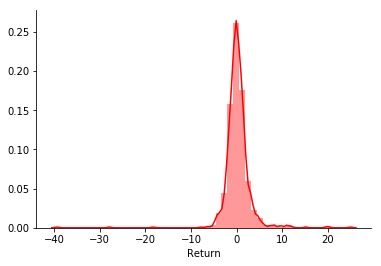

In [25]:
sns.distplot(train_data.loc[:1000,'09:30:00'].dropna(),color='Red')
plt.xlabel('Return')
sns.despine()

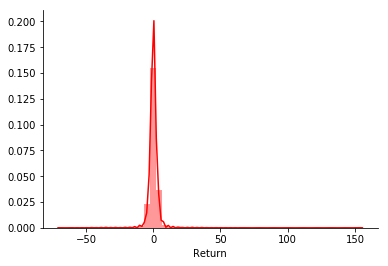

In [26]:
sns.distplot(train_data.loc[:10000,'09:30:00'].dropna(),color='Red')
plt.xlabel('Return')
sns.despine()

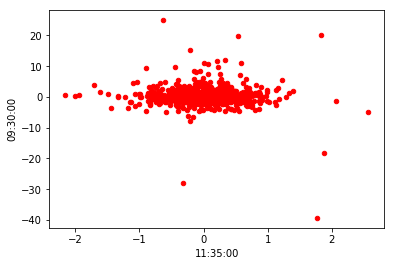

In [27]:
train_data_1000.plot.scatter(x='11:35:00',y='09:30:00',c='Red',)

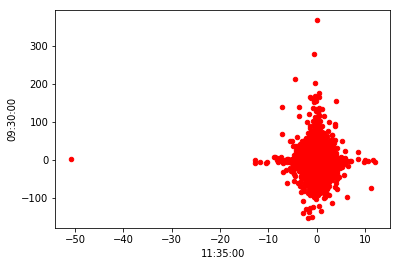

In [28]:
train_data.plot.scatter(x='11:35:00',y='09:30:00',c='Red',)

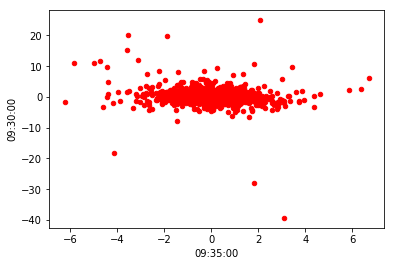

In [29]:

train_data_1000.plot.scatter(x='09:35:00',y='09:30:00',c='Red',)

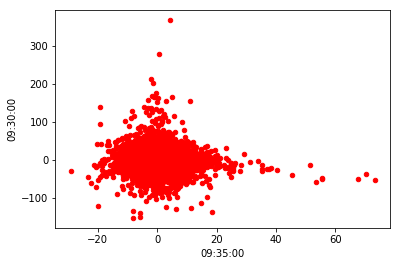

In [30]:
#coreleation b/w attribute '09:35:00' and '09:30:00' 
train_data.plot.scatter(x='09:35:00',y='09:30:00',c='Red',)

**Analysis**



coreleatiob b/w attribute '09:35:00' and '09:30:00' frm the graph we can conclude that both attributes have strong coreleation because data is more condensed from -100 to 100 and coreleation cofficents should be nearer to Zero.

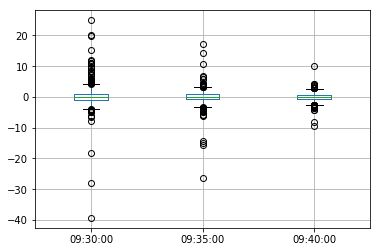

In [31]:
train_data_1000.boxplot(column=['09:30:00','09:35:00','09:40:00'])

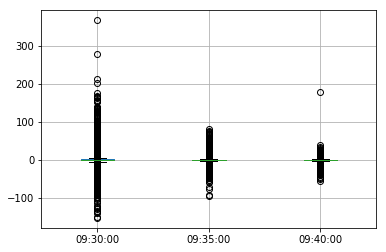

In [32]:
train_data.boxplot(column=['09:30:00','09:35:00','09:40:00'])

**Analysis**



As the no of outliers are not in the same pattern as in 1st 1000 tuples so we can say that in different value range our data ay show some abnormal 

In [33]:
#skewness of data to replace outlies
train_data_1000.skew()

ID          0.000000
09:30:00   -1.778702
09:35:00   -2.325986
09:40:00   -0.226359
09:45:00    1.072372
09:50:00    0.135556
09:55:00    0.656408
10:00:00    0.500251
10:05:00    0.109864
10:10:00    0.428672
10:15:00    0.569340
10:20:00   -0.028140
10:25:00    0.077352
10:30:00   -0.005321
10:35:00   -0.782058
10:40:00    0.246171
10:45:00   -0.224436
10:50:00   -0.439837
10:55:00    0.368103
11:00:00   -0.419610
11:05:00    0.485384
11:10:00   -0.378877
11:15:00    0.180627
11:20:00    0.522989
11:25:00   -0.403226
11:30:00   -0.107445
11:35:00   -0.004715
11:40:00    0.292942
11:45:00   -0.238629
11:50:00   -0.236713
              ...   
12:55:00   -0.248409
13:00:00   -0.075165
13:05:00   -0.068320
13:10:00    0.011349
13:15:00   -0.125840
13:20:00    0.023087
13:25:00    0.161913
13:30:00    0.115783
13:35:00   -0.688683
13:40:00    0.813839
13:45:00    0.113154
13:50:00    0.207748
13:55:00   -0.117900
14:00:00    0.097161
14:05:00   -1.111966
14:10:00    0.182502
14:15:00   -0

In [34]:
#skewness of data to replace outlies
train_data.skew()

ID          1.171852e-16
09:30:00    3.228107e+00
09:35:00   -1.023446e-01
09:40:00    3.024711e+00
09:45:00   -6.586792e-01
09:50:00    3.767782e+00
09:55:00   -4.696299e-01
10:00:00   -2.398597e-02
10:05:00    1.911644e-01
10:10:00   -4.110496e-01
10:15:00    5.564638e-01
10:20:00   -2.582156e-01
10:25:00   -3.414310e-01
10:30:00    4.143439e-01
10:35:00    5.190718e-01
10:40:00   -7.775294e-01
10:45:00    1.754475e+00
10:50:00    2.313061e-01
10:55:00    1.836783e-01
11:00:00    2.057970e-01
11:05:00    1.141876e-01
11:10:00    1.733664e-01
11:15:00   -1.320966e-01
11:20:00   -4.418478e-01
11:25:00    1.477051e-02
11:30:00    9.344896e-02
11:35:00   -1.370270e+00
11:40:00    6.448917e-02
11:45:00    2.109154e-01
11:50:00    1.041154e-01
                ...     
12:55:00   -3.190294e-01
13:00:00    1.269513e+00
13:05:00    5.589666e+00
13:10:00    3.354556e+00
13:15:00    2.999922e+00
13:20:00    3.619486e-01
13:25:00    1.330215e+00
13:30:00    2.677519e+00
13:35:00    1.508014e+00


In [0]:
train_data['end_of_day_return']=pd.Series(output_train_data['end_of_day_return'])

In [36]:
train_data.head(5)

,ID,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,10:20:00,10:25:00,10:30:00,10:35:00,10:40:00,10:45:00,10:50:00,10:55:00,11:00:00,11:05:00,11:10:00,11:15:00,11:20:00,11:25:00,11:30:00,11:35:00,11:40:00,11:45:00,11:50:00,11:55:00,12:00:00,12:05:00,12:10:00,12:15:00,12:20:00,12:25:00,12:30:00,12:35:00,12:40:00,12:45:00,12:50:00,12:55:00,13:00:00,13:05:00,13:10:00,13:15:00,13:20:00,13:25:00,13:30:00,13:35:00,13:40:00,13:45:00,13:50:00,13:55:00,14:00:00,14:05:00,14:10:00,14:15:00,14:20:00,14:25:00,14:30:00,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00,end_of_day_return
0,0,0.378421,0.062977,-1.699955,-0.253532,0.317230,-1.394081,-1.338014,-0.320252,-0.384785,-0.256910,-0.900090,-0.129039,-0.129104,0.064585,-0.387410,-0.064666,0.258731,-1.098495,0.064896,-0.064880,-0.324482,0.194937,0.064929,0.519303,-0.194344,0.194492,0.777374,-0.064585,0.000000,-0.129202,0.129267,0.000000,-0.452207,-0.064716,-0.258928,-0.388786,0.259585,0.000000,-0.064831,0.453929,-0.323660,0.000000,0.259256,-0.129497,-0.064781,0.259190,-0.194196,0.453468,-0.064666,0.000000,-0.129366,0.323578,0.000000,0.517070,-0.258013,0.258273,-0.129006,0.000000,-0.064536,-0.258208,0.129235,-0.258339,-0.193950,0.129398,0.064666,0.323250,0.193705,0.387117,0.257687,0.064357,-0.193022,0.964025
1,1,-0.588441,-0.393182,0.918810,0.392393,0.195901,-0.195754,0.000000,0.130601,0.261071,0.130405,0.130340,0.000000,-0.130275,0.130340,0.000000,0.455961,0.000000,-0.130047,0.000000,0.650560,-0.129788,-0.519411,-0.130112,0.000000,0.065089,-0.065072,-0.260354,-0.260614,-0.195656,-0.065268,0.326421,-0.130405,-0.260940,-0.065300,0.261267,0.130503,0.260875,0.130307,-0.065121,0.130275,0.390629,0.065007,0.064991,0.389850,-0.519023,-0.325037,-0.390531,0.000000,-0.130372,-0.065219,-0.130470,0.000000,0.000000,0.326339,0.000000,-0.065186,-0.130405,0.130470,-0.195607,0.065251,0.000000,0.000000,-0.260940,0.000000,-0.130601,0.130666,0.130601,0.130536,0.521881,0.260419,0.910557,-0.583286
2,2,-0.974472,1.789703,-0.105310,-0.456042,0.894337,-0.341168,-0.373679,1.103954,0.587386,-1.095339,-0.574771,0.208303,0.630542,-0.402462,0.347219,0.122446,-0.056845,0.222259,0.191040,0.429745,0.053589,-0.386521,0.230273,-0.400565,-0.033761,0.339111,-0.144419,-0.504458,0.173000,-0.166326,0.113288,NaN,-0.581179,-0.058946,0.029037,-0.264249,-0.058772,0.358270,-0.436575,-0.090113,-0.268220,0.273938,-0.300095,0.255542,0.219462,0.009756,-0.169758,0.241045,-0.422619,0.861903,-0.079175,-0.043251,0.048260,0.000599,-0.095017,0.490884,0.658008,0.036576,0.139653,-0.011309,0.029409,-0.331103,-0.236124,-0.256959,-0.229774,0.063974,-0.570371,0.133774,-0.123741,-0.764930,0.230346,2.191065
3,3,-4.612982,1.746131,1.092367,-0.030626,0.996415,-1.391209,0.169799,-0.827777,-0.291823,0.302953,-0.229828,0.674382,-0.646990,-0.006002,-0.258403,0.512462,0.209581,-1.131744,0.428971,-0.112520,-0.683127,0.277338,-0.134035,-0.124190,0.196775,0.553562,-0.144010,0.234784,-0.124352,-0.058201,0.111158,0.476066,-0.843241,-0.233058,-0.475416,0.059371,0.498486,0.390726,0.476144,0.228087,-0.630597,0.194059,-0.111132,-0.184750,-0.170428,0.304415,0.078454,-0.257402,0.261525,0.314271,-0.646613,-0.360380,-0.108701,-0.537355,-0.140600,-0.075488,-0.325931,-0.006815,-0.245942,0.074408,-0.009349,0.336335,-0.185523,0.521719,-0.095356,-0.207925,0.318842,0.119798,-0.155044,0.290896,-0.058833,0.406176
4,4,-2.642804,-0.772708,-0.115318,0.145272,-0.136105,0.450894,-0.046230,1.186248,-0.269528,0.196175,-0.755941,-0.357649,0.875004,0.636713,0.509647,0.157567,0.962157,-0.502309,-0.285578,0.260371,0.472079,-0.133699,-0.033602,0.612150,0.052271,-0.039839,0.109932,0.466685,-0.249362,0.406413,-0.260829,0.748697,0.368675,-0.447986,-0.922882,-0.017411,0.352352,0.473783,0.440662,-0.136045,-0.247754,0.273805,0.179370,-0.610452,0.178690,-0.317357,-0.547541,0.515383,0.172688,0.004467,0.666214,0.171539,-0.213380,-0.149159,-0.033096,-0.398863,-0.243490,-0.807128,2.308409,-0.182956,-0.080754,0.631221,0.

In [37]:
df=train_data.corr(method='pearson')
#df['end_of_day_return']

c1 = df.abs().unstack()
c1['end_of_day_return'].sort_values(ascending = False)

end_of_day_return    1.000000e+00
15:20:00             3.038943e-02
15:10:00             2.373345e-02
09:30:00             2.104502e-02
15:15:00             1.383971e-02
15:05:00             9.157033e-03
12:05:00             9.034986e-03
09:40:00             8.596537e-03
15:00:00             8.385756e-03
09:50:00             8.090419e-03
13:40:00             7.584813e-03
14:40:00             7.513783e-03
09:35:00             7.430070e-03
10:45:00             7.029252e-03
09:45:00             6.910393e-03
10:25:00             6.346266e-03
13:35:00             6.217785e-03
14:10:00             6.003824e-03
11:30:00             5.729039e-03
12:35:00             5.687691e-03
10:35:00             5.509878e-03
12:50:00             5.506696e-03
11:55:00             5.361452e-03
10:20:00             5.338205e-03
14:20:00             5.039360e-03
11:05:00             4.933319e-03
11:00:00             4.912807e-03
10:05:00             4.878885e-03
14:05:00             4.851677e-03
09:55:00      

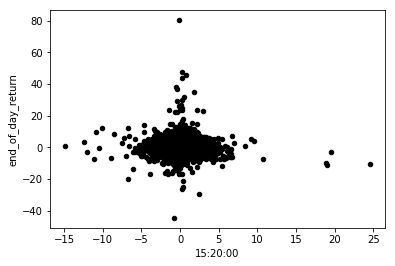

In [38]:
train_data.plot.scatter(x='15:20:00',y='end_of_day_return',c='Black',)

**Analysis**

Attributes having larger correleation cofficent with output variables shoild not be droped because they have strong impact in determining output data.

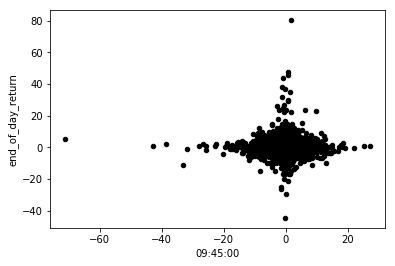

In [39]:
train_data.plot.scatter(x='09:45:00',y='end_of_day_return',c='Black',)

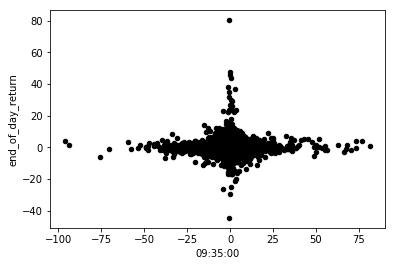

In [40]:
train_data.plot.scatter(x='09:35:00',y='end_of_day_return',c='Black',)

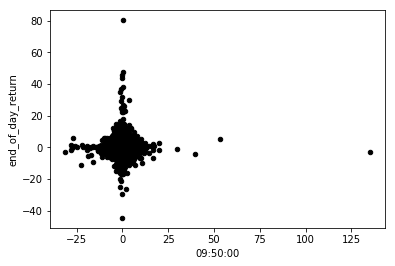

In [41]:
train_data.plot.scatter(x='09:50:00',y='end_of_day_return',c='Black',)

**Analysis**

In the above three graph as the points are more close to zero in a smaller range value so the attributes which are more condensed must have higher magnitude of correleation cofficent.So while training the model they have to be taken as primary attributes.

In [42]:
train_data.corr()

,ID,09:30:00,09:35:00,09:40:00,09:45:00,09:50:00,09:55:00,10:00:00,10:05:00,10:10:00,10:15:00,10:20:00,10:25:00,10:30:00,10:35:00,10:40:00,10:45:00,10:50:00,10:55:00,11:00:00,11:05:00,11:10:00,11:15:00,11:20:00,11:25:00,11:30:00,11:35:00,11:40:00,11:45:00,11:50:00,11:55:00,12:00:00,12:05:00,12:10:00,12:15:00,12:20:00,12:25:00,12:30:00,12:35:00,12:40:00,12:45:00,12:50:00,12:55:00,13:00:00,13:05:00,13:10:00,13:15:00,13:20:00,13:25:00,13:30:00,13:35:00,13:40:00,13:45:00,13:50:00,13:55:00,14:00:00,14:05:00,14:10:00,14:15:00,14:20:00,14:25:00,14:30:00,14:35:00,14:40:00,14:45:00,14:50:00,14:55:00,15:00:00,15:05:00,15:10:00,15:15:00,15:20:00,end_of_day_return
ID,1.000000,0.000034,-0.000362,0.000466,0.001388,0.001999,0.001485,0.002363,0.000337,-0.000184,-0.001738,-0.000779,0.000393,-0.001848,0.000025,0.001250,0.001517,0.000967,-0.000050,-0.002220,0.000762,0.000404,-0.000352,0.000275,-0.002770,-0.000309,0.001375,-0.000066,0.001020,0.000068,0.000110,0.000686,-0.002710,-6.273727e-05,-0.001196,0.000022,-0.001125,-0.001743,0.000471,0.001403,-0.001674,0.001400,0.000070,0.002216,0.002454,-0.001061,0.002180,0.002471,-0.000366,0.003015,0.001017,-0.001947,-0.001174,-0.001867,3.149573e-04,0.002422,0.001668,0.002033,-0.000344,0.000340,0.000781,0.001159,0.001453,0.000092,0.000600,-0.000296,0.001806,0.000747,0.001555,0.000067,-0.001066,-0.000877,-5.601597e-04
09:30:00,0.000034,1.000000,-0.074923,-0.019481,0.005756,-0.007969,-0.000521,0.000023,0.002687,-0.003927,0.007901,-0.002356,0.006176,-0.003054,0.012814,-0.005542,0.009257,-0.005842,-0.004171,-0.010470,0.003494,-0.005361,0.003473,0.001531,-0.000209,0.005702,0.002377,-0.005770,0.002366,-0.011414,-0.004768,-0.005668,0.005164,-5.482388e-03,0.004215,-0.008109,0.001409,-0.005483,0.001354,0.000596,0.006551,-0.009072,0.006478,0.000427,0.002464,-0.003302,0.000122,0.001387,0.005251,0.004361,-0.000477,-0.002688,0.008260,-0.001632,2.114401e-05,0.000420,-0.002445,0.000675,-0.000622,-0.008735,0.001874,0.000055,0.004247,-0.004460,0.000960,-0.001199,-0.002459,-0.000126,0.000126,-0.003966,0.004714,-0.000248,-2.104502e-02
09:35:00,-0.000362,-0.074923,1.000000,-0.033472,-0.014262,-0.007007,0.008479,-0.018007,-0.001388,-0.004540,0.001909,0.005975,0.000477,-0.007061,-0.000715,-0.000572,0.007990,-0.001629,0.002535,-0.009683,-0.001545,0.001521,0.003055,-0.001926,-0.000148,-0.001241,0.004191,0.004669,0.004491,0.002409,-0.000971,-0.002996,0.003282,1.450283e-03,-0.000724,0.002794,0.001834,-0.002468,-0.000578,-0.003295,-0.000255,-0.000888,0.001526,-0.004281,-0.005611,-0.000489,-0.000668,0.003079,0.001974,0.000664,0.004113,0.001284,0.006108,0.000701,-2.299177e-04,-0.003004,-0.002394,0.003088,0.000555,-0.001015,0.004525,-0.004972,0.000917,-0.000957,0.006247,-0.002943,0.004168,-0.010197,-0.003620,0.000990,0.000067,-0.000804,-7.430070e-03
09:40:00,0.000466,-0.019481,-0.033472,1.000000,-0.059804,-0.013804,0.008364,-0.016355,-0.004558,-0.002615,0.007713,0.004148,0.000285,-0.005865,-0.000262,0.002141,0.008009,-0.000274,-0.000590,-0.007783,-0.001884,-0.005398,0.003189,0.005123,-0.001656,-0.002941,-0.005641,0.001632,0.004666,-0.002338,0.004712,-0.010059,0.000982,-3.462768e-03,0.001384,0.002437,0.004138,-0.006245,-0.000398,-0.002406,0.005046,-0.005025,0.002771,-0.003234,-0.002952,-0.002171,0.001006,-0.000928,0.002529,-0.004786,0.002599,0.001154,0.002993,-0.001082,1.435668e-03,-0.005944,-0.004704,-0.000475,0.003211,0.000163,0.003022,-0.000190,0.001993,-0.000700,0.003089,0.002142,-0.003620,-0.007854,-0.004808,-0.000538,-0.001162,0.001979,-8.596537e-03
09:45:00,0.001388,0.005756,-0.014262,-0.059804,1.000000,-0.031110,-0.009130,-0.016051,0.000614,-0.007779,0.001566,0.004943,0.008084,-0.002936,-0.000608,-0.002012,-0.003598,-0.001489,0.001504,-0.010535,0.000182,0.000235,0.003826,-0.001020,0.004742,-0.004432,0.000907,0.000577,0.002365,-0.000785,0.003995,-0.003983,-0.000709,-1.770118e-03,-0.000475,0.000724,0.004306,-0.003746,0.000430,0.005713,0.004528,-0.006286,0.000471,-0.005397,-0.002273,-0.000110,0.004042,0.003346,0.003992,-0.002253,0.